Схема даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

Назви стовпців і типи даних:
Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Перші п'ять рядків:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote

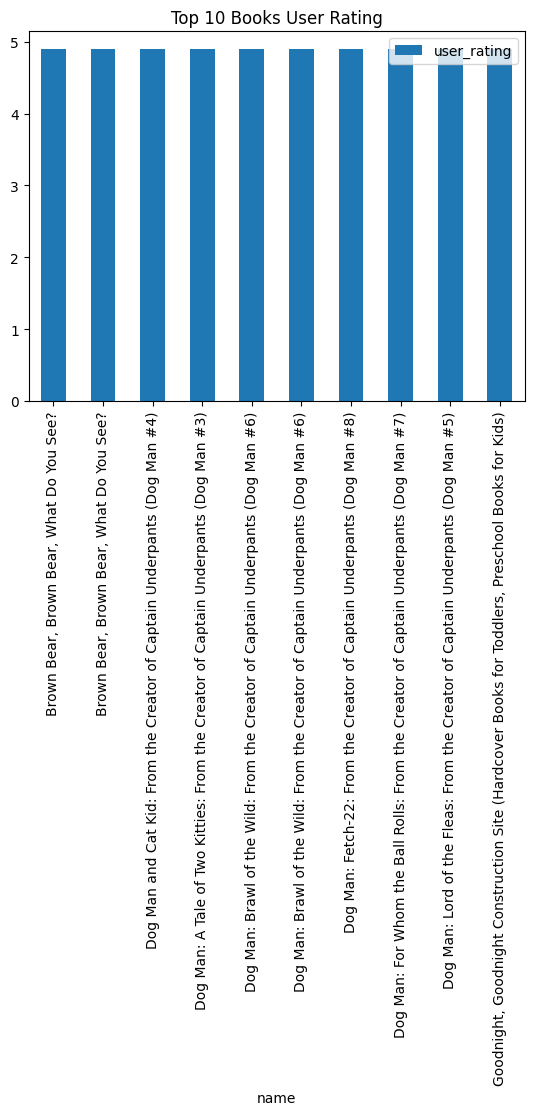

In [1]:
import pandas as pd

# Завантаження даних з файлу
df = pd.read_csv("/content/bestsellers with categories.csv")

# Виведення схеми даних за допомогою PrintSchema
print("Схема даних:")
print(df.info())

# Виведення назв стовпців і типів даних за допомогою dtypes
print("\nНазви стовпців і типи даних:")
print(df.dtypes)

# Виведення перших п'ять рядків
print("\nПерші п'ять рядків:")
print(df.head())

# Виведення першого рядка за допомогою first()
print("\nПерший рядок:")
print(df.head(1))

# Опис датасету за допомогою describe()
print("\nОпис датасету:")
print(df.describe())

# Виведення списку стовпців
print("\nСписок стовпців:")
print(df.columns.tolist())

# Виведення загальної кількості рядків даних
print("\nЗагальна кількість рядків даних:", len(df))

# Перевірка пропусків та їх заміна на NaN
if df.isnull().values.any():
    df.fillna(value=pd.np.nan, inplace=True)
    print("\nЄ пропуски даних. Замінено на NaN.")

# Заміна комірок з пропущеними значеннями на середні за стовпцем
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# Зміна назв всіх колонок
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Знайдення автора з найвищим рейтингом
highest_rating_author = df[df['user_rating'] == df['user_rating'].max()]['author'].iloc[0]
print("\nАвтор з найвищим рейтингом:", highest_rating_author)

# Знайдення автора з найнижчим рейтингом
lowest_rating_author = df[df['user_rating'] == df['user_rating'].min()]['author'].iloc[0]
print("Автор з найнижчим рейтингом:", lowest_rating_author)

# Знайдення автора з найбільшою кількістю рецензій
most_reviewed_author = df[df['reviews'] == df['reviews'].max()]['author'].iloc[0]
print("Автор з найбільшою кількістю рецензій:", most_reviewed_author)

# Побудова гістограми рейтингу 10 найкращих книг
top_10_books = df.nlargest(10, 'user_rating')
top_10_books.plot(kind='bar', x='name', y='user_rating', title='Top 10 Books User Rating')

# Побудова матриці кореляції для стовпчиків 'user_rating', 'reviews', 'price'
correlation_matrix = df[['user_rating', 'reviews', 'price']].corr()
print("\nМатриця кореляції:")
print(correlation_matrix)
